In [15]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = '0.2'

In [16]:
np.random.seed(15)
data = np.random.randint(-1,2, 30*4).reshape(30,4)
xs = np.c_[np.zeros([data.shape[0]]), data] 
xs[:5]

array([[ 0.00000000, -1.00000000,  0.00000000, -1.00000000,  0.00000000],
       [ 0.00000000, -1.00000000, -1.00000000,  0.00000000,  1.00000000],
       [ 0.00000000,  0.00000000,  0.00000000,  0.00000000, -1.00000000],
       [ 0.00000000,  1.00000000,  1.00000000, -1.00000000,  0.00000000],
       [ 0.00000000,  0.00000000, -1.00000000,  0.00000000, -1.00000000]])

In [17]:
xs.shape

(30, 5)

In [18]:
ys = np.random.randint(0, 2, 30)
ys.resize(30,1)
ys[:6]

array([[0],
       [1],
       [1],
       [0],
       [1],
       [1]])

The function I define below does not really find a solution yet. 
I just wanted to see if I would be able to write it like that.

In [19]:
def search_weights(xs, iterations, act_func, l_nodes, ys):
    
    c_weights = lambda ins, outs: np.random.randn(ins, outs)
    W = [c_weights(xs.shape[1], l_nodes[0])] + [c_weights(i, j) for i,j in zip(l_nodes, l_nodes[1:])]
    err = []
    
    for i in range(iterations):
        W = [c_weights(xs.shape[1], l_nodes[0])] + [c_weights(i, j) for i,j in zip(l_nodes, l_nodes[1:])]
        x = xs @ W[0]
        for i in range(len(W)-1):
            x = act_func(x)
            x = x @ W[i+1]
        yh = x
        e = yh - ys           
        e = np.sum(np.abs(e)) 
        if e < 0.05:
            print('we have converged after {} iterations'.format(i))
            print(ws)
            break
#         else:
#             mutation = weights(nodes1, outs)*.2
#             cw = ws + mutation
#             x = xs @ wi
#             x = np.sin(x)
#             yh = x @ cw
#             ce = yh - ys
#             ce = np.sum(np.abs(ce))
#             if ce < e:
#                 ws = cw
        err.append(e)
    return W, err

In [20]:
W, err = search_weights(xs,2000,np.sin,[3, 4, 3, 6],ys)
min(err), max(err)

(120.09728332918175, 368.7765157498893)

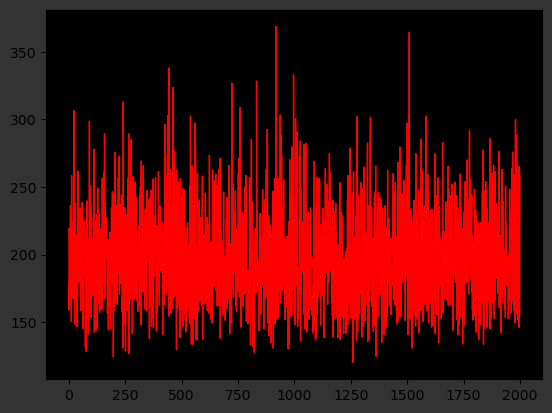

In [21]:
plt.axes().set_facecolor('black')
plt.plot(err,color='red', linewidth=1)
plt.show()

In [22]:
len(err), min(err)

(2000, 120.09728332918175)

In [23]:
np.set_printoptions(suppress=False, floatmode='fixed')

In [24]:
list_nodes = [3, 4, 7, 6, 8, 2, 1]
weights = lambda ins, outs: np.random.randn(ins, outs)
err = []
a=0
weights2 = []
weights2.append(weights(xs.shape[1], list_nodes[0]))
weights2

[array([[-0.95316234, -0.32694697,  1.57867242],
        [ 0.27045372,  0.03880517,  0.08315614],
        [ 0.56719075,  2.20717200,  1.66164732],
        [-0.55420406, -0.12762778,  0.19853260],
        [-1.07936180, -0.38241295, -0.21327603]])]

In [25]:
Nodes = [weights(xs.shape[1], list_nodes[0])] + [weights(i, j) for i,j in zip(list_nodes, list_nodes[1:])]

In [26]:
[list_nodes[0]] + [(i,j) for i,j in zip(list_nodes, list_nodes[1:])]

[3, (3, 4), (4, 7), (7, 6), (6, 8), (8, 2), (2, 1)]